# Instacart Market Basket Analysis

## Importing the required libraries

In [ ]:

# Import the libraries you'll need for this analysis

import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
# Load the datasets

# Note: These files use semicolon (;) as the separator instead of comma
orders         = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products       = pd.read_csv('/datasets/products.csv', sep=';')
departments    = pd.read_csv('/datasets/departments.csv', sep=';')
aisles         = pd.read_csv('/datasets/aisles.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')


## Analyze your data

In the cells below, display the datasets using `.info()` and `.head()` to gain insights into their structure and content.

- `.info()`: Provides a concise summary of the dataset, including the data types, non-null counts, and memory usage.
- `.head()`: Displays the first few rows of the dataset, offering a quick overview of the data values.

In [18]:

# Import the libraries you'll need for this analysis
import pandas as pd
import matplotlib.pyplot as plt


# In this cell, type "orders" below this line and execute the cell
# Note: These files use semicolon (;) as the separator instead of comma
orders         = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products       = pd.read_csv('/datasets/products.csv', sep=';')
departments    = pd.read_csv('/datasets/departments.csv', sep=';')
aisles         = pd.read_csv('/datasets/aisles.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [19]:

# Import the libraries you'll need for this analysis
import pandas as pd
import matplotlib.pyplot as plt

# In this cell, type "products" below this line and execute the cell
# Note: These files use semicolon (;) as the separator instead of comma
orders         = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products       = pd.read_csv('/datasets/products.csv', sep=';')
departments    = pd.read_csv('/datasets/departments.csv', sep=';')
aisles         = pd.read_csv('/datasets/aisles.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')


products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Repeat this process for each dataset to understand the structure, including the types of columns and rows they contain. Add additional code cells as needed for your analysis.

In [20]:
# In this cell, type "orders.info() below this line and execute the cell
# Import the libraries you'll need for this analysis
import pandas as pd
import matplotlib.pyplot as plt

# In this cell, type "products" below this line and execute the cell
# Note: These files use semicolon (;) as the separator instead of comma
orders         = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products       = pd.read_csv('/datasets/products.csv', sep=';')
departments    = pd.read_csv('/datasets/departments.csv', sep=';')
aisles         = pd.read_csv('/datasets/aisles.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


The "Non-Null Count" column provides information about any missing values in each column of the dataset. With a total of 478,952 entries, observe any columns where the non-null count is less than this number to identify missing values.

In [23]:

# Import the libraries you'll need for this analysis
import pandas as pd
import matplotlib.pyplot as plt

# In this cell, type "products" below this line and execute the cell
# Note: These files use semicolon (;) as the separator instead of comma
orders         = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products       = pd.read_csv('/datasets/products.csv', sep=';')
departments    = pd.read_csv('/datasets/departments.csv', sep=';')
aisles         = pd.read_csv('/datasets/aisles.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

# In this cell, run orders_products.info() below, but include the argument show_counts=True since this is a large file.
order_products.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


Repeat the use of .info() on the remaining datasets to identify missing values and understand their structure. Check the "Non-Null Count" for each dataset to spot any columns with missing values.

## Find and Remove Missing Values

We noticed that some columns contain missing values.

Here are some useful code snippets:

```python
# Identify missing values in each column
print(dataset.isnull().sum())

# Display rows where a specific column has missing values
print(dataset[dataset['column_name'].isna()])

# Confirm no missing values remain
print(dataset.isnull().sum())
```

### `products` Data Frame

We will begin by addressing the missing values in the `products` data frame.

In [24]:
# Import and load data (your standard block)
import pandas as pd
import matplotlib.pyplot as plt

orders         = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products       = pd.read_csv('/datasets/products.csv', sep=';')
departments    = pd.read_csv('/datasets/departments.csv', sep=';')
aisles         = pd.read_csv('/datasets/aisles.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

# Display rows where product_name is missing
print(products[products['product_name'].isna()])


       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


It seems suspicious that all rows with missing `product_name` might be associated with `aisle_id` 100 and `department_id` 21. Let’s verify this by checking if any rows with missing `product_name` have an `aisle_id` different from 100 and 21. This will help us confirm if the issue is isolated to this aisle or spread across others.

In [25]:
# Combine conditions to check for missing product names in aisles other than 100
# [Your standard import/load block]

# Combine conditions to check for missing product names in aisles other than 100
print(products[(products['product_name'].isna()) & (products['aisle_id'] != 100)])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [26]:
# [Your standard import/load block]

# Combine conditions to check for missing product names in aisles other than 21
print(products[(products['product_name'].isna()) & (products['aisle_id'] != 21)])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


To better understand the missing product_name values, let’s determine what department_id 21 and aisle_id 100 represent by referencing the departments and aisles tables.

In [27]:
# What is this aisle and department?
# [Your standard import/load block]

# What is this aisle and department?
print("Aisle 100:")
print(aisles[aisles['aisle_id'] == 100])
print("\nDepartment 21:")
print(departments[departments['department_id'] == 21])

Aisle 100:
    aisle_id    aisle
99       100  missing

Department 21:
    department_id department
20             21    missing


In [28]:
# Fill missing product names with 'Unknown'
# [Your standard import/load block]

# Fill missing product names with 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')

# Verify it worked
print(products['product_name'].isna().sum())  # Should show 0

0


### `orders` data frame

Now let's fill in missing values from the `orders` table.

In [29]:
# Display rows where the days_since_prior_order column has missing values
# [Your standard import/load block]

# Display rows where days_since_prior_order has missing values
print(orders[orders['days_since_prior_order'].isna()])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4                 19   
478945   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

In [30]:
# Are there any missing values where it's not a customer's first order?
# [Your standard import/load block]

# Check if any missing values where order_number != 1 (not a first order)
print(orders[(orders['days_since_prior_order'].isna()) & (orders['order_number'] != 1)])

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


All of the missing `'days_since_prior_order'` values correspond to a customer's first ever order. This makes sense because there is no prior order! We'll leave the values as `NaN` so the column can remain numeric. Also, the `NaN` values shouldn't interfere with any calculations we might do using this column.

### `order_products` data frame

Now let's fill in missing values from the order_products table.

In [31]:
# Display rows where the add_to_cart_order column has missing values
# [Your standard import/load block]

# Display rows where add_to_cart_order has missing values
print(order_products[order_products['add_to_cart_order'].isna()])

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [32]:
# Use .min() and .max() to find the minimum and maximum values for this column.
# [Your standard import/load block]

# Use .min() and .max() to find the minimum and maximum values for this column
print("Minimum add_to_cart_order:", order_products['add_to_cart_order'].min())
print("Maximum add_to_cart_order:", order_products['add_to_cart_order'].max())

Minimum add_to_cart_order: 1.0
Maximum add_to_cart_order: 64.0


In [33]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
# [Your standard import/load block]

# Save all order IDs with at least one missing value in 'add_to_cart_order'
ordersWithMissingValues = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()
print(f"Found {len(ordersWithMissingValues)} orders with missing values")

Found 70 orders with missing values


In [34]:
# Do all orders with missing values have more than 64 products?
# [Your standard import/load block]

# Get order IDs with missing values
ordersWithMissingValues = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()

# Count products per order for those orders
orderCounts = order_products[order_products['order_id'].isin(ordersWithMissingValues)].groupby('order_id').size()

# Check if all have more than 64 products
print("Orders with missing values - product counts:")
print(orderCounts.describe())
print("\nAll have more than 64 products?", (orderCounts > 64).all())

Orders with missing values - product counts:
count     70.000000
mean      75.942857
std       12.898585
min       65.000000
25%       67.000000
50%       71.000000
75%       78.000000
max      127.000000
dtype: float64

All have more than 64 products? True


In [35]:
# Replace missing values with 999 and convert column to integer type
# [Your standard import/load block]

# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype(int)

# Verify the change
print("Missing values remaining:", order_products['add_to_cart_order'].isna().sum())
print("Data type:", order_products['add_to_cart_order'].dtype)
print("\nSample of replaced values:")
print(order_products[order_products['add_to_cart_order'] == 999].head())

Missing values remaining: 0
Data type: int64

Sample of replaced values:
       order_id  product_id  add_to_cart_order  reordered
737     2449164        5068                999          0
9926    1968313       43867                999          0
14394   2926893       11688                999          0
16418   1717990        4142                999          0
30114   1959075       42828                999          1


For some reason, any item placed in the cart 65th or later has a missing value in the `'add_to_cart_order'` column. Maybe the data type of that column in the database could only hold integer values from 1 to 64. We've decided to replace the missing values with a code value, 999, that represents an unknown placed in cart order above 64. We also converted the column to integer data type. We just need to be careful to remember this if we perform calculations using this column during our analysis.

Other sensible code values we could've used are 0 or -1 because they don't show up elsewhere in the dataset and they don't have any real physical meaning for this variable.

Also note that, for orders with exactly 65 items, we could replace the missing value with 65. But we're going to neglect that for now since we can't determine the 65th item for all orders with 66 items or more.

## Find and Remove Duplicate Values from All the Datasets

Each dataset may contain duplicate rows, which can lead to redundancy and affect the accuracy of our analysis. To handle this:

1. Use the `.duplicated()` method to identify duplicate rows. This method returns a Boolean series where `True` indicates a duplicate row.
2. Apply the `.drop_duplicates()` method to remove these duplicate rows, ensuring a cleaner dataset.
3. Optionally, you can set the `keep` parameter in `.drop_duplicates()` to specify which duplicate to retain (`'first'` or `'last'`).

Here is some example code for reference:
```python
# Check for duplicates
print(dataset.duplicated().sum())  # Number of duplicate rows

# View duplicate rows
print(dataset[dataset.duplicated()]

# Remove duplicates
dataset = dataset.drop_duplicates().reset_index(drop=True)

# Confirm removal
print(dataset.duplicated().sum())  # Should return 0
```

Repeat this process for all datasets to ensure they are free of duplicate rows.

### `orders` data frame

In [36]:
# Find the number of duplicate rows in the orders dataframe
# [Your standard import/load block]

# Find the number of duplicate rows in the orders dataframe
print(orders.duplicated().sum())

15


In [37]:
# View the duplicate rows
# [Your standard import/load block]

# View the duplicate rows
print(orders[orders.duplicated()])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

In [38]:
# Remove duplicate orders
# [Your standard import/load block]

# Remove duplicate orders
orders = orders.drop_duplicates().reset_index(drop=True)

# Confirm removal
print("Remaining duplicates:", orders.duplicated().sum())

Remaining duplicates: 0


In [39]:
# Double check for duplicate rows
# [Your standard import/load block]

# Remove duplicates first
orders = orders.drop_duplicates().reset_index(drop=True)

# Double check for duplicate rows
print("Final duplicate count:", orders.duplicated().sum())

Final duplicate count: 0


### `products` data frame

In [40]:
# Check for fully duplicate rows
# [Your standard import/load block]

# Check for fully duplicate rows
print("Fully duplicate rows:", products.duplicated().sum())

Fully duplicate rows: 0


In [41]:
# Check for just duplicate product IDs using subset='product_id' in duplicated()
# [Your standard import/load block]

# Check for just duplicate product IDs using subset='product_id' in duplicated()
print("Duplicate product_ids:", products.duplicated(subset='product_id').sum())

Duplicate product_ids: 0


Hint: To identify duplicate product names more effectively, convert the names to lowercase for consistent comparison. Use the .str.lower() method on the product_name column to standardize the text before checking for duplicates.

In [42]:
# Check for just duplicate product names (convert names to lowercase to compare better)
# [Your standard import/load block]

# Check for just duplicate product names (convert names to lowercase to compare better)
print("Duplicate product names (case-insensitive):", products['product_name'].str.lower().duplicated().sum())

Duplicate product names (case-insensitive): 1361


Let's see what that looks like in our dataset :

In [ ]:
products[products['product_name'].str.lower() == 'high performance energy drink']

In [45]:
# [Your standard import/load block]

# Drop duplicate product names (case insensitive)
products['product_name_lower'] = products['product_name'].str.lower()
products = products.drop_duplicates(subset='product_name_lower').reset_index(drop=True)
products = products.drop('product_name_lower', axis=1)

# Confirm removal
print("Remaining duplicate names:", products['product_name'].str.lower().duplicated().sum())


Remaining duplicate names: 0


### `departments` data frame

In [46]:
# Check for duplicate entries in the departments dataframe
departments[departments.duplicated()]

,department_id,department


### `aisles` data frame

In [47]:
# Check for aisles entries in the departments dataframe
# [Your standard import/load block]

# Check for aisles entries in the departments dataframe
print(aisles.duplicated().sum())

0


### `order_products` data frame

In [48]:
# Check for duplicate entries in the order_products dataframe
# [Your standard import/load block]

# Check for duplicate entries in the order_products dataframe
print(order_products.duplicated().sum())

0


We have now successfully cleaned our data. Let's begin our exploratory data analysis.

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

To verify that the values in the `order_hour_of_day` and `order_dow` columns are sensible:

1. **Check unique values**: Use `.unique()` on each column to extract all distinct values present.
2. **Sort the results**: Use `sorted()` to arrange the unique values in ascending order for easier verification.
3. **Validate ranges**:
   - Ensure `order_hour_of_day` values range from 0 to 23 (representing hours of the day).
   - Ensure `order_dow` values range from 0 to 6 (representing days of the week).

This process confirms that the data aligns with expected ranges and there are no out-of-bound or invalid entries.

In [49]:
# [Your standard import/load block]
import pandas as pd
import matplotlib.pyplot as plt

orders         = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products       = pd.read_csv('/datasets/products.csv', sep=';')
departments    = pd.read_csv('/datasets/departments.csv', sep=';')
aisles         = pd.read_csv('/datasets/aisles.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

# Check unique values in order_hour_of_day and order_dow
print("Unique order_hour_of_day values:")
print(sorted(orders['order_hour_of_day'].unique()))
print("\nUnique order_dow values:")
print(sorted(orders['order_dow'].unique()))

Unique order_hour_of_day values:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

Unique order_dow values:
[0, 1, 2, 3, 4, 5, 6]


In [50]:
# [Your standard import/load block]
import pandas as pd
import matplotlib.pyplot as plt

orders         = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products       = pd.read_csv('/datasets/products.csv', sep=';')
departments    = pd.read_csv('/datasets/departments.csv', sep=';')
aisles         = pd.read_csv('/datasets/aisles.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

# Validate ranges
hourMin = orders['order_hour_of_day'].min()
hourMax = orders['order_hour_of_day'].max()
dowMin = orders['order_dow'].min()
dowMax = orders['order_dow'].max()

print(f"order_hour_of_day range: {hourMin} to {hourMax}")
print(f"Valid range (0-23): {hourMin >= 0 and hourMax <= 23}")
print(f"\norder_dow range: {dowMin} to {dowMax}")
print(f"Valid range (0-6): {dowMin >= 0 and dowMax <= 6}")

order_hour_of_day range: 0 to 23
Valid range (0-23): True

order_dow range: 0 to 6
Valid range (0-6): True


### [A2] What time of day do people shop for groceries?

To determine the time of day people shop for groceries, analyze the order_hour_of_day column in the orders dataset. Use .value_counts() to count the number of orders placed at each hour, and then sort the results by the hour for a clear chronological order.

Finally, visualize the data with a bar plot to easily observe the shopping trends across different times of the day.

0      3180
1      1763
2      1004
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_hour_of_day, dtype: int64


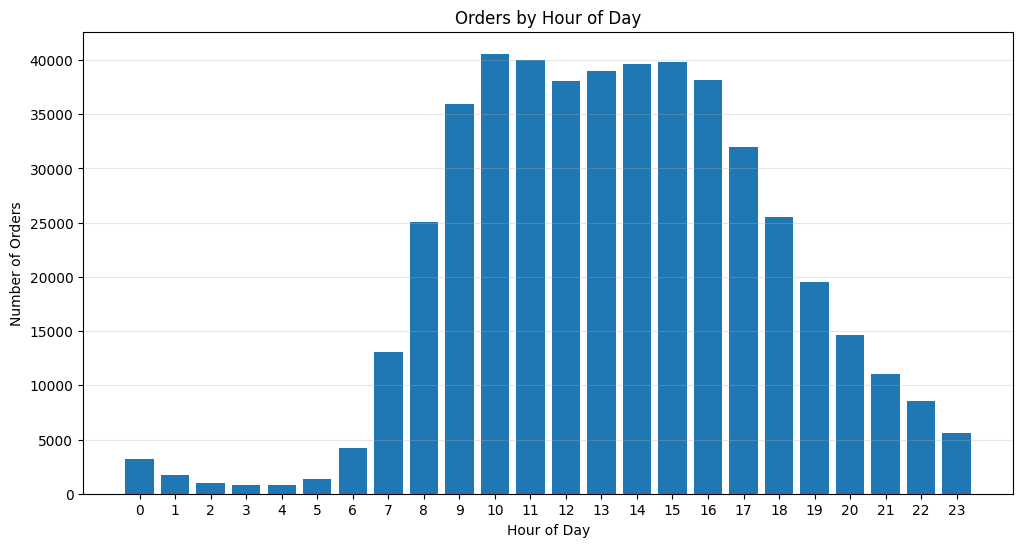

In [51]:
# [Your standard import/load block]
import pandas as pd
import matplotlib.pyplot as plt

orders         = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products       = pd.read_csv('/datasets/products.csv', sep=';')
departments    = pd.read_csv('/datasets/departments.csv', sep=';')
aisles         = pd.read_csv('/datasets/aisles.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

# Count orders by hour of day
hourCounts = orders['order_hour_of_day'].value_counts().sort_index()

# Display the counts
print(hourCounts)

# Create bar plot
plt.figure(figsize=(12, 6))
plt.bar(hourCounts.index, hourCounts.values)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Orders by Hour of Day')
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.3)
plt.show()

Most orders occur between 9:00 AM and 5:00 PM, with peaks at 10:00 AM and 3:00 PM

### [A3] What day of the week do people shop for groceries?

To figure out what day of the week people shop for groceries, analyze the order_dow column in the orders dataset. Use .value_counts() to count the number of orders for each day of the week, and then sort the results by the day index to maintain the correct order.

Visualize the data with a bar plot to clearly observe shopping patterns across the days of the week.

0    84090
1    82185
2    65833
3    60912
4    59810
5    63488
6    62649
Name: order_dow, dtype: int64


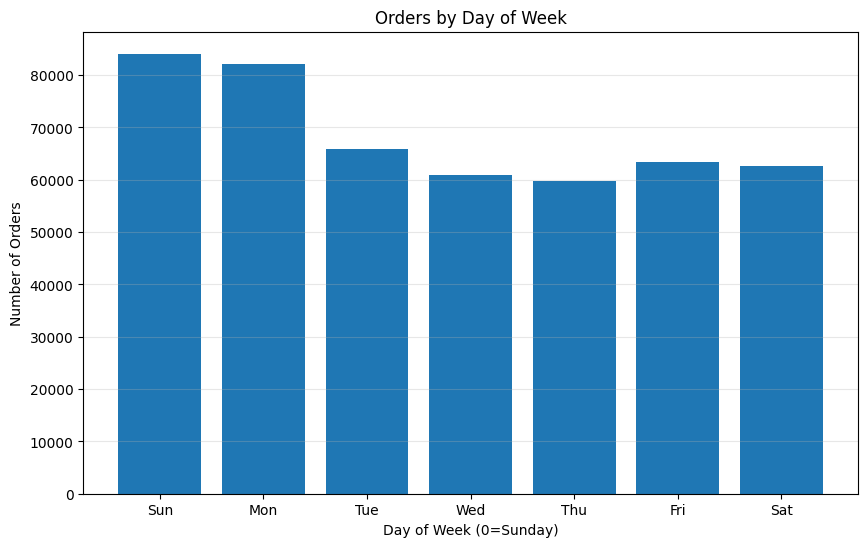

In [52]:
# [Your standard import/load block]
import pandas as pd
import matplotlib.pyplot as plt

orders         = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products       = pd.read_csv('/datasets/products.csv', sep=';')
departments    = pd.read_csv('/datasets/departments.csv', sep=';')
aisles         = pd.read_csv('/datasets/aisles.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

# Count orders by day of week
dowCounts = orders['order_dow'].value_counts().sort_index()

# Display the counts
print(dowCounts)

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(dowCounts.index, dowCounts.values)
plt.xlabel('Day of Week (0=Sunday)')
plt.ylabel('Number of Orders')
plt.title('Orders by Day of Week')
plt.xticks(range(0, 7), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.grid(axis='y', alpha=0.3)
plt.show()

The data dictionary does not state which integer corresponds to which day of the week. Assuming Sunday = 0, then people place more orders at the beginning of the week (Sunday and Monday).

### [A4] How long do people wait until placing another order?

To understand how long people wait before placing another order, analyze the days_since_prior_order column in the orders dataset. Use .value_counts() to count how many orders were placed for each interval of days, then sort the results by the number of days for clarity.

Visualize the data using a bar plot to observe patterns in ordering frequency over time.

0.0      9589
1.0     20179
2.0     27141
3.0     30225
4.0     31007
5.0     30096
6.0     33931
7.0     44579
8.0     25361
9.0     16754
10.0    13310
11.0    11467
12.0    10658
13.0    11737
14.0    13992
15.0     9416
16.0     6588
17.0     5498
18.0     4972
19.0     4939
20.0     5302
21.0     6448
22.0     4514
23.0     3337
24.0     3015
25.0     2711
26.0     2640
27.0     2986
28.0     3745
29.0     2673
30.0    51338
Name: days_since_prior_order, dtype: int64


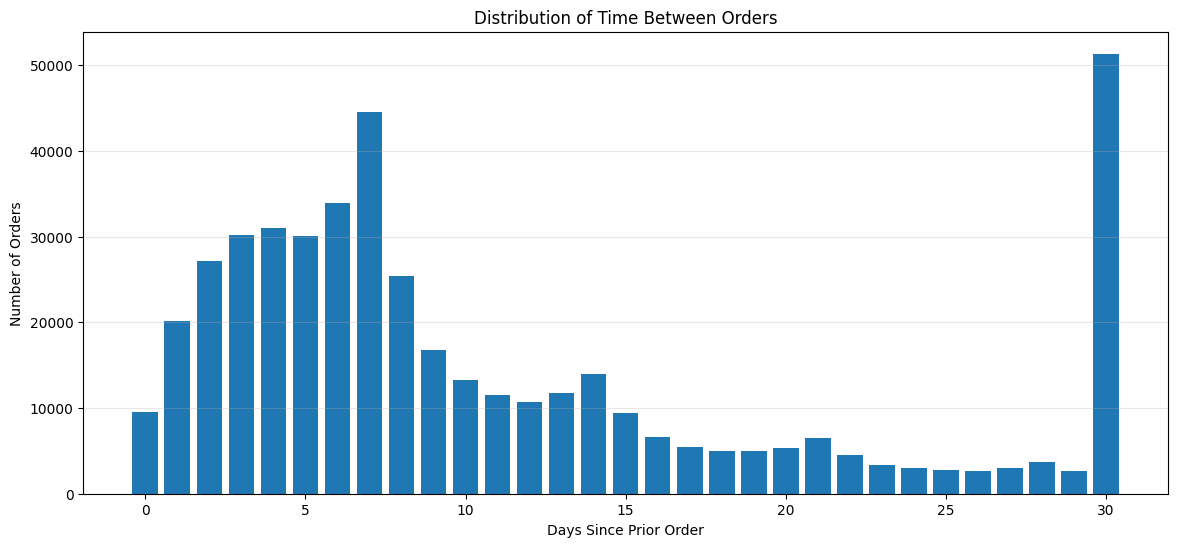

In [53]:
# [Your standard import/load block]
import pandas as pd
import matplotlib.pyplot as plt

orders         = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products       = pd.read_csv('/datasets/products.csv', sep=';')
departments    = pd.read_csv('/datasets/departments.csv', sep=';')
aisles         = pd.read_csv('/datasets/aisles.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

# Count orders by days_since_prior_order
dayCounts = orders['days_since_prior_order'].value_counts().sort_index()

# Display the counts
print(dayCounts)

# Create bar plot
plt.figure(figsize=(14, 6))
plt.bar(dayCounts.index, dayCounts.values)
plt.xlabel('Days Since Prior Order')
plt.ylabel('Number of Orders')
plt.title('Distribution of Time Between Orders')
plt.grid(axis='y', alpha=0.3)
plt.show()

The 0 values probably correspond to customers who placed more than one order on the same day.

The max value of 30 days and the high spike at that value is puzzling though. The spike might be explained by people who set up recurring subscriptions to automatically order once a month. But that doesn't explain why there are no values above 30 days. I would expect many customers to place orders less often than once a month. Maybe those customers were intentionally excluded from the dataset.

Disregarding the spike at 30 days, most people wait between 2 to 10 days in between orders. The most common wait time is 7 days. In other words, it's common for people to place weekly grocery orders. Interestingly, in the tail of the distribution we also see small spikes at 14, 21, and 28 days. These would correspond to orders every 2, 3, or 4 weeks.

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the bar charts for both days and describe the differences that you see.

To determine if there's a difference in the `order_hour_of_day` distributions on Wednesdays and Saturdays, follow these steps:

1. **Create masks** for Wednesday (`order_dow == 3`) and Saturday (`order_dow == 6`) to filter the orders data.
2. **Count the order hours** for each day using `.value_counts()` and sort them by hour with `.sort_index()` for clarity.
3. **Combine the counts** for both days into a single DataFrame using `pd.concat()`, and label the columns for easier interpretation.

After preparing the data, plot bar charts for both days to visually compare the distribution of order times. Look for patterns such as peaks or differences in the busiest times throughout the day.

In [54]:
# Create masks for Wednesday (3) and Saturday (6)
wednesdayMask = orders['order_dow'] == 3
saturdayMask = orders['order_dow'] == 6

# Filter the data
wednesdayOrders = orders[wednesdayMask]
saturdayOrders = orders[saturdayMask]

print(f"Wednesday orders: {len(wednesdayOrders)}")
print(f"Saturday orders: {len(saturdayOrders)}")

Wednesday orders: 60912
Saturday orders: 62649


In [55]:
# Filter data
wednesdayOrders = orders[orders['order_dow'] == 3]
saturdayOrders = orders[orders['order_dow'] == 6]

# Count hours for each day
wednesdayCounts = wednesdayOrders['order_hour_of_day'].value_counts().sort_index()
saturdayCounts = saturdayOrders['order_hour_of_day'].value_counts().sort_index()

print("Wednesday counts:")
print(wednesdayCounts)
print("\nSaturday counts:")
print(saturdayCounts)

Wednesday counts:
0      373
1      215
2      121
3      101
4      108
5      170
6      643
7     1732
8     3125
9     4490
10    5026
11    5004
12    4688
13    4674
14    4774
15    5163
16    4976
17    4175
18    3463
19    2652
20    1917
21    1450
22    1154
23     718
Name: order_hour_of_day, dtype: int64

Saturday counts:
0      464
1      254
2      177
3      125
4      118
5      161
6      451
7     1619
8     3246
9     4311
10    4919
11    5116
12    5132
13    5323
14    5375
15    5188
16    5029
17    4295
18    3338
19    2610
20    1847
21    1473
22    1185
23     893
Name: order_hour_of_day, dtype: int64


In [56]:
# Filter and count
wednesdayOrders = orders[orders['order_dow'] == 3]
saturdayOrders = orders[orders['order_dow'] == 6]
wednesdayCounts = wednesdayOrders['order_hour_of_day'].value_counts().sort_index()
saturdayCounts = saturdayOrders['order_hour_of_day'].value_counts().sort_index()

# Combine into DataFrame
comparison = pd.concat([wednesdayCounts, saturdayCounts], axis=1)
comparison.columns = ['Wednesday', 'Saturday']

print(comparison)

    Wednesday  Saturday
0         373       464
1         215       254
2         121       177
3         101       125
4         108       118
5         170       161
6         643       451
7        1732      1619
8        3125      3246
9        4490      4311
10       5026      4919
11       5004      5116
12       4688      5132
13       4674      5323
14       4774      5375
15       5163      5188
16       4976      5029
17       4175      4295
18       3463      3338
19       2652      2610
20       1917      1847
21       1450      1473
22       1154      1185
23        718       893


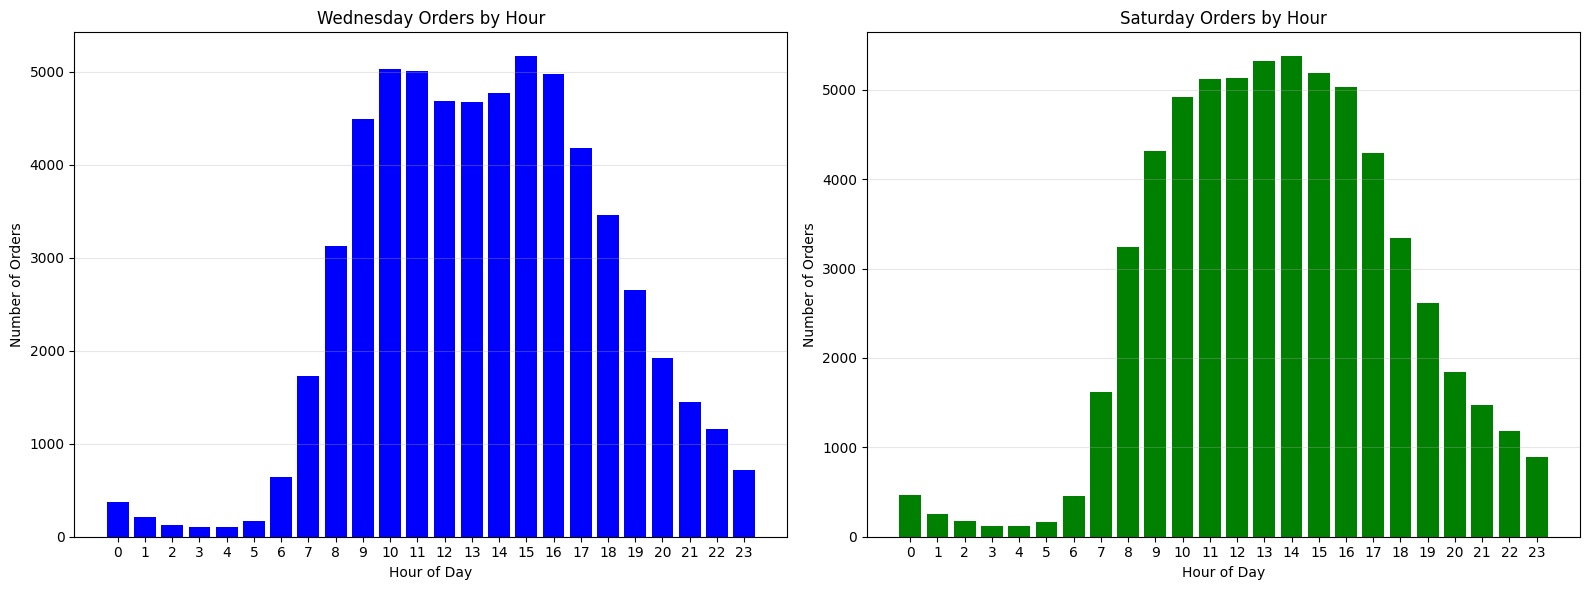

In [57]:
# Filter and count
wednesdayOrders = orders[orders['order_dow'] == 3]
saturdayOrders = orders[orders['order_dow'] == 6]
wednesdayCounts = wednesdayOrders['order_hour_of_day'].value_counts().sort_index()
saturdayCounts = saturdayOrders['order_hour_of_day'].value_counts().sort_index()

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Wednesday plot
ax1.bar(wednesdayCounts.index, wednesdayCounts.values, color='blue')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Number of Orders')
ax1.set_title('Wednesday Orders by Hour')
ax1.set_xticks(range(0, 24))
ax1.grid(axis='y', alpha=0.3)

# Saturday plot
ax2.bar(saturdayCounts.index, saturdayCounts.values, color='green')
ax2.set_xlabel('Hour of Day')
ax2.set_ylabel('Number of Orders')
ax2.set_title('Saturday Orders by Hour')
ax2.set_xticks(range(0, 24))
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

There's a small dip from 11h to 13h on Wednesdays. This dip is absent on Saturdays. Maybe this dip can be attributed to people who don't use Instacart because they have lunch somewhere between 11h and 13h.

### [B2] What's the distribution for the number of orders per customer?

To explore the distribution of the number of orders per customer:

1. **Group the data** by `user_id` to calculate the total number of orders for each customer. Use `.groupby('user_id')` and count the `order_id` for each group.
2. **Sort the results** using `.sort_values()` for better readability.
3. **Visualize the distribution** using a histogram to observe how many orders most customers typically place.

Adjust the number of bins in the histogram to refine the visualization and better capture the pattern.

In [58]:
# Group by user_id and count orders
ordersPerCustomer = orders.groupby('user_id')['order_id'].count().sort_values()

print(ordersPerCustomer.head(20))
print(f"\nTotal customers: {len(ordersPerCustomer)}")
print(f"Min orders: {ordersPerCustomer.min()}")
print(f"Max orders: {ordersPerCustomer.max()}")
print(f"Mean orders: {ordersPerCustomer.mean():.2f}")

user_id
48965     1
139884    1
139876    1
60408     1
139873    1
139871    1
139868    1
139867    1
60414     1
60415     1
60416     1
139864    1
60420     1
139862    1
60423     1
139859    1
60426     1
60431     1
60433     1
139850    1
Name: order_id, dtype: int64

Total customers: 157437
Min orders: 1
Max orders: 28
Mean orders: 3.04


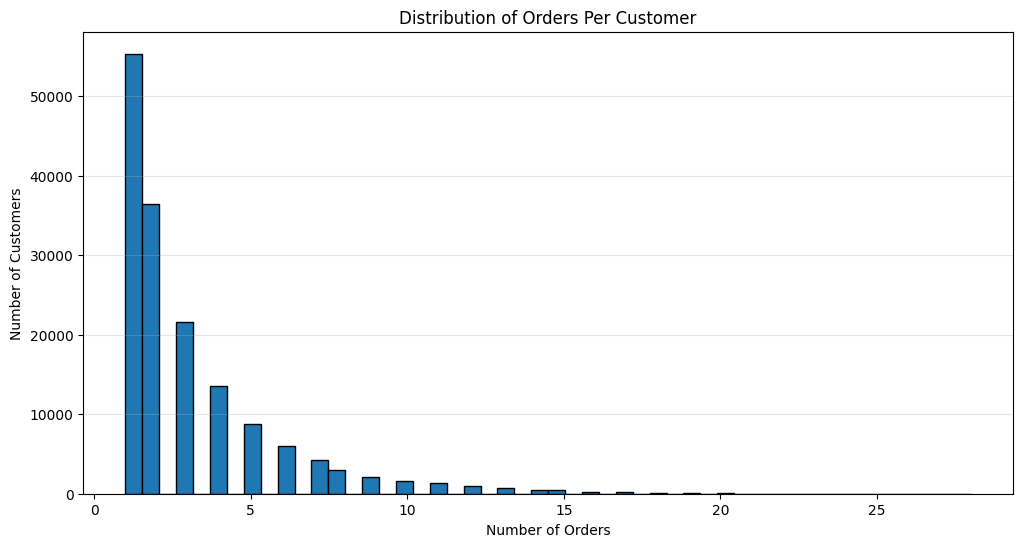

In [59]:
# Group and count
ordersPerCustomer = orders.groupby('user_id')['order_id'].count()

# Create histogram
plt.figure(figsize=(12, 6))
plt.hist(ordersPerCustomer, bins=50, edgecolor='black')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.title('Distribution of Orders Per Customer')
plt.grid(axis='y', alpha=0.3)
plt.show()

Most customers in the dataset have placed between 1 and 10 orders, with number of orders per customer sharply decreasing after just 1 order.

### [B3] What are the top 20 popular products (display their id and name)?

To identify the top 20 most popular products:

1. **Merge the datasets**: Combine `order_products` and `products` on `product_id` to access both the product IDs and names in a single DataFrame.
2. **Group the data**: Group by both `product_id` and `product_name` to aggregate the order counts for each product using `.size()`.
3. **Sort the results**: Use `.sort_values(ascending=False)` to rank products by their popularity.
4. **Display the top 20**: Use `.head(20)` to focus on the most frequently ordered products.
5. **Visualize the results**: Create a bar chart to highlight the top products and their order counts.

This will give you a clear view of the most popular products and their ranking.


In [60]:
# Merge order_products with products to get product names
mergedData = order_products.merge(products, on='product_id')

# Group by product_id and product_name, count orders
productCounts = mergedData.groupby(['product_id', 'product_name']).size().sort_values(ascending=False)

# Display top 20
print(productCounts.head(20))

product_id  product_name            
24852       Banana                      66050
13176       Bag of Organic Bananas      53297
21137       Organic Strawberries        37039
21903       Organic Baby Spinach        33971
47209       Organic Hass Avocado        29773
47766       Organic Avocado             24689
47626       Large Lemon                 21495
16797       Strawberries                20018
26209       Limes                       19690
27845       Organic Whole Milk          19600
27966       Organic Raspberries         19197
22935       Organic Yellow Onion        15898
24964       Organic Garlic              15292
45007       Organic Zucchini            14584
39275       Organic Blueberries         13879
49683       Cucumber Kirby              13675
28204       Organic Fuji Apple          12544
5876        Organic Lemon               12232
8277        Apple Honeycrisp Organic    11993
40706       Organic Grape Tomatoes      11781
dtype: int64


In [61]:
# Merge and group
mergedData = order_products.merge(products, on='product_id')
productCounts = mergedData.groupby(['product_id', 'product_name']).size().sort_values(ascending=False).head(20)

# Convert to DataFrame
top20Products = productCounts.reset_index()
top20Products.columns = ['product_id', 'product_name', 'order_count']

print(top20Products)

    product_id              product_name  order_count
0        24852                    Banana        66050
1        13176    Bag of Organic Bananas        53297
2        21137      Organic Strawberries        37039
3        21903      Organic Baby Spinach        33971
4        47209      Organic Hass Avocado        29773
5        47766           Organic Avocado        24689
6        47626               Large Lemon        21495
7        16797              Strawberries        20018
8        26209                     Limes        19690
9        27845        Organic Whole Milk        19600
10       27966       Organic Raspberries        19197
11       22935      Organic Yellow Onion        15898
12       24964            Organic Garlic        15292
13       45007          Organic Zucchini        14584
14       39275       Organic Blueberries        13879
15       49683            Cucumber Kirby        13675
16       28204        Organic Fuji Apple        12544
17        5876             O

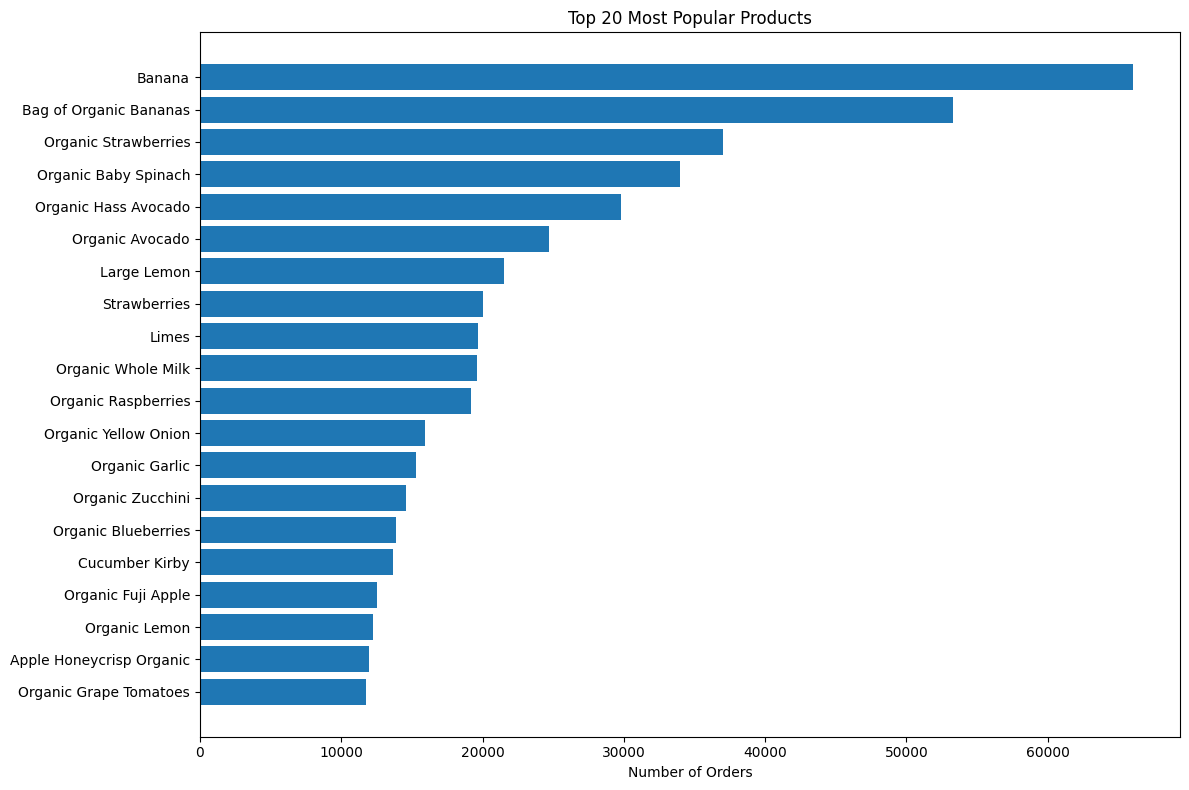

In [62]:
# Merge and group
mergedData = order_products.merge(products, on='product_id')
productCounts = mergedData.groupby(['product_id', 'product_name']).size().sort_values(ascending=False).head(20)
top20Products = productCounts.reset_index()
top20Products.columns = ['product_id', 'product_name', 'order_count']

# Create bar chart
plt.figure(figsize=(12, 8))
plt.barh(range(len(top20Products)), top20Products['order_count'])
plt.yticks(range(len(top20Products)), top20Products['product_name'])
plt.xlabel('Number of Orders')
plt.title('Top 20 Most Popular Products')
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()

The top 20 items are all produce, except for the milk. Looks like people want delicious and nutritious!

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?
To analyze how many items people typically buy in one order:

1. **Group the data** by `order_id` and count the number of products (`product_id`) in each order using `.count()`. This gives the number of items in each order.
2. **Aggregate the counts**: Use `.value_counts()` to determine how frequently different order sizes occur, and then sort the results with `.sort_index()` to organize by the number of items.
3. **Visualize the distribution**: Use a bar plot to show the frequency of orders for each size, with the x-axis representing the number of items and the y-axis representing the number of orders.

This will help you understand the typical size of a grocery order and identify any trends in purchasing behavior.

In [63]:
# Group by order_id and count products in each order
itemsPerOrder = order_products.groupby('order_id')['product_id'].count()

print(itemsPerOrder.head(20))
print(f"\nMean items per order: {itemsPerOrder.mean():.2f}")
print(f"Median items per order: {itemsPerOrder.median():.2f}")

order_id
4      13
9      15
11      5
19      3
20      8
31     10
48      8
56     10
61     12
68      9
75     16
80      7
81     11
83     14
99      7
114    10
131    18
142     7
143    25
148    14
Name: product_id, dtype: int64

Mean items per order: 10.10
Median items per order: 8.00


In [64]:
# Count items per order
itemsPerOrder = order_products.groupby('order_id')['product_id'].count()

# How frequently does each order size occur?
orderSizeDistribution = itemsPerOrder.value_counts().sort_index()

print(orderSizeDistribution.head(30))

1     21847
2     26292
3     29046
4     31054
5     31923
6     31698
7     30822
8     28539
9     25742
10    23248
11    20406
12    18539
13    16497
14    14472
15    12696
16    11465
17    10002
18     8726
19     7612
20     6771
21     5738
22     5096
23     4422
24     3838
25     3382
26     2812
27     2458
28     2137
29     1899
30     1618
Name: product_id, dtype: int64


Most of the order numbers are in the tail of the distribution. To get a better look at the non-tail part, let's choose a value in the tail as a cutoff and just plot order with fewer than that many items. An order size of 35 items is far enough into the tail for this.

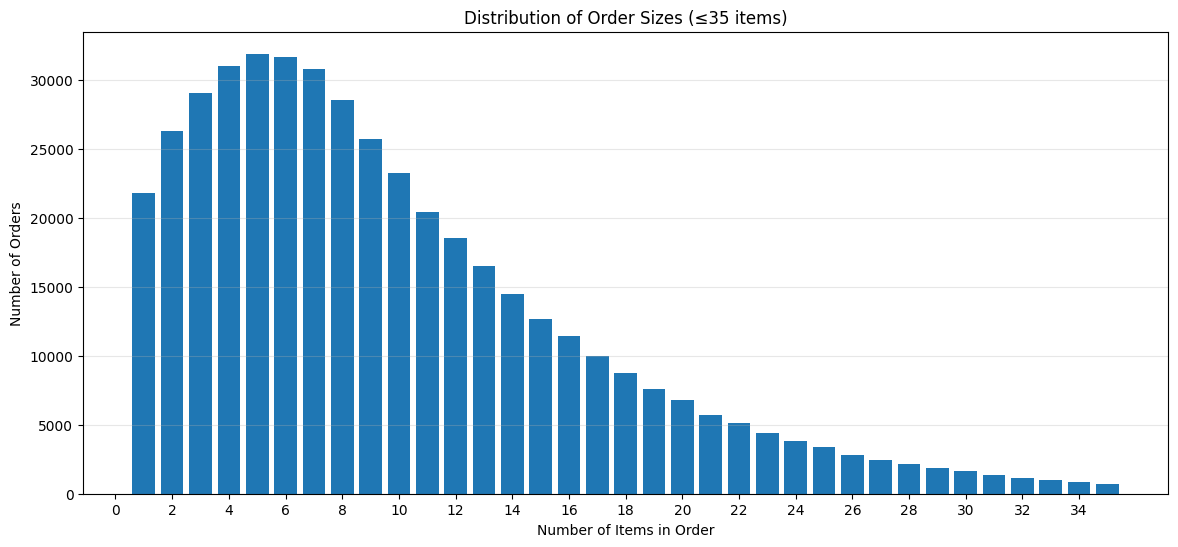

In [65]:
# Count items per order
itemsPerOrder = order_products.groupby('order_id')['product_id'].count()
orderSizeDistribution = itemsPerOrder.value_counts().sort_index()

# Filter to orders with 35 or fewer items (to avoid long tail)
filteredDistribution = orderSizeDistribution[orderSizeDistribution.index <= 35]

# Create bar plot
plt.figure(figsize=(14, 6))
plt.bar(filteredDistribution.index, filteredDistribution.values)
plt.xlabel('Number of Items in Order')
plt.ylabel('Number of Orders')
plt.title('Distribution of Order Sizes (≤35 items)')
plt.xticks(range(0, 36, 2))
plt.grid(axis='y', alpha=0.3)
plt.show()

The typical order contains 5 or 6 items, with most orders having between 1 and 20 items.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

To find the top 20 most frequently reordered items:

1. **Filter the data**: Use `order_products['reordered'] == 1` to isolate only the products that have been reordered.
2. **Merge the datasets**: Combine the filtered `order_products` with the `products` dataset on `product_id` to get both the product names and IDs.
3. **Group the data**: Group by both `product_id` and `product_name` to calculate how many times each product was reordered, using `.size()`.
4. **Sort the results**: Use `.sort_values(ascending=False)` to rank the products by reorder frequency.
5. **Display the top 20**: Use `.head(20)` to focus on the most frequently reordered products.
6. **Visualize the data**: Create a bar chart to showcase the top reordered items and their frequencies.

This process highlights the products that customers consistently return to and reorder.

In [66]:
# Filter for reordered items only
reorderedItems = order_products[order_products['reordered'] == 1]

print(f"Total reordered items: {len(reorderedItems)}")
print(reorderedItems.head())

Total reordered items: 2683838
   order_id  product_id  add_to_cart_order  reordered
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1
5   2456893       21616                4.0          1


In [67]:
# Filter and merge
reorderedItems = order_products[order_products['reordered'] == 1]
reorderedWithNames = reorderedItems.merge(products, on='product_id')

# Group and count
reorderCounts = reorderedWithNames.groupby(['product_id', 'product_name']).size().sort_values(ascending=False)

print(reorderCounts.head(20))

product_id  product_name            
24852       Banana                      55763
13176       Bag of Organic Bananas      44450
21137       Organic Strawberries        28639
21903       Organic Baby Spinach        26233
47209       Organic Hass Avocado        23629
47766       Organic Avocado             18743
27845       Organic Whole Milk          16251
47626       Large Lemon                 15044
27966       Organic Raspberries         14748
16797       Strawberries                13945
26209       Limes                       13327
22935       Organic Yellow Onion        11145
24964       Organic Garlic              10411
45007       Organic Zucchini            10076
49683       Cucumber Kirby               9538
28204       Organic Fuji Apple           8989
8277        Apple Honeycrisp Organic     8836
39275       Organic Blueberries          8799
5876        Organic Lemon                8412
49235       Organic Half & Half          8389
dtype: int64


In [68]:
# Filter, merge, group
reorderedItems = order_products[order_products['reordered'] == 1]
reorderedWithNames = reorderedItems.merge(products, on='product_id')
reorderCounts = reorderedWithNames.groupby(['product_id', 'product_name']).size().sort_values(ascending=False).head(20)

# Convert to DataFrame
top20Reordered = reorderCounts.reset_index()
top20Reordered.columns = ['product_id', 'product_name', 'reorder_count']

print(top20Reordered)

    product_id              product_name  reorder_count
0        24852                    Banana          55763
1        13176    Bag of Organic Bananas          44450
2        21137      Organic Strawberries          28639
3        21903      Organic Baby Spinach          26233
4        47209      Organic Hass Avocado          23629
5        47766           Organic Avocado          18743
6        27845        Organic Whole Milk          16251
7        47626               Large Lemon          15044
8        27966       Organic Raspberries          14748
9        16797              Strawberries          13945
10       26209                     Limes          13327
11       22935      Organic Yellow Onion          11145
12       24964            Organic Garlic          10411
13       45007          Organic Zucchini          10076
14       49683            Cucumber Kirby           9538
15       28204        Organic Fuji Apple           8989
16        8277  Apple Honeycrisp Organic        

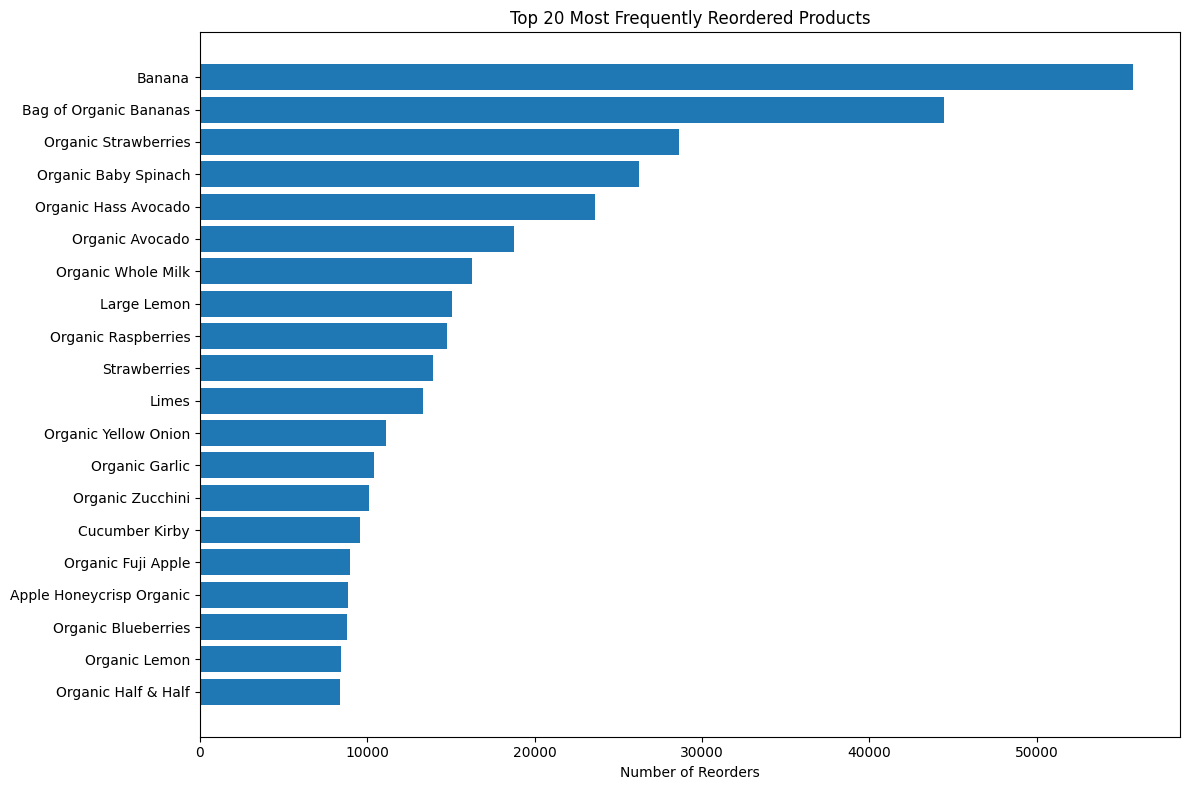

In [69]:
# Complete pipeline
reorderedItems = order_products[order_products['reordered'] == 1]
reorderedWithNames = reorderedItems.merge(products, on='product_id')
reorderCounts = reorderedWithNames.groupby(['product_id', 'product_name']).size().sort_values(ascending=False).head(20)
top20Reordered = reorderCounts.reset_index()
top20Reordered.columns = ['product_id', 'product_name', 'reorder_count']

# Create bar chart
plt.figure(figsize=(12, 8))
plt.barh(range(len(top20Reordered)), top20Reordered['reorder_count'])
plt.yticks(range(len(top20Reordered)), top20Reordered['product_name'])
plt.xlabel('Number of Reorders')
plt.title('Top 20 Most Frequently Reordered Products')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

It looks like produce and dairy comprise the most reordered products as well. It makes sense that perishables would be the most reordered items.

### [C3] For each product, what proportion of its orders are reorders?

To calculate the proportion of orders for each product that are reorders:

1. **Merge the datasets**: Combine `order_products` with the `products` dataset to access product names and IDs in the same DataFrame.
2. **Group the data**: Group by `product_id` and `product_name` to isolate each product's order history.
3. **Calculate the mean of `reordered`**: Use `.mean()` on the `reordered` column to compute the proportion of orders for each product that were reorders. The value represents the reorder rate.
4. **Sort the results**: Use `.sort_values(ascending=False)` to rank products by their reorder rates.
5. **Convert to a DataFrame**: Use `.reset_index()` to organize the grouped data into a readable DataFrame.
6. **Optional Sorting**: Sort the results by `product_id` or another column for better clarity.

This approach provides insights into how frequently each product is reordered, helping identify customer favorites or staples.


In [70]:
# Merge order_products with products
mergedData = order_products.merge(products, on='product_id')

# Group by product_id and product_name, calculate mean of reordered column
reorderRate = mergedData.groupby(['product_id', 'product_name'])['reordered'].mean()

print(reorderRate.head(20))

product_id  product_name                                                     
1           Chocolate Sandwich Cookies                                           0.564286
2           All-Seasons Salt                                                     0.000000
3           Robust Golden Unsweetened Oolong Tea                                 0.738095
4           Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce    0.510204
7           Pure Coconut Water With Orange                                       0.500000
8           Cut Russet Potatoes Steam N' Mash                                    0.315789
9           Light Strawberry Blueberry Yogurt                                    0.761905
10          Sparkling Orange Juice & Prickly Pear Beverage                       0.448071
11          Peach Mango Juice                                                    0.625000
12          Chocolate Fudge Layer Cake                                           0.390244
13          Saline Nas

In [ ]:
# Merge and calculate reorder rate
mergedData = order_products.merge(products, on='product_id')
reorderRate = mergedData.groupby(['product_id', 'product_name'])['reordered'].mean().sort_values(ascending=False)

# Convert to DataFrame
reorderRateDF = reorderRate.reset_index()
reorderRateDF.columns = ['product_id', 'product_name', 'reorder_rate']

print(reorderRateDF.head(20))
print(f"\nMean reorder rate across all products: {reorderRateDF['reorder_rate'].mean():.3f}")

In [71]:
# Calculate reorder rate
mergedData = order_products.merge(products, on='product_id')
reorderRate = mergedData.groupby(['product_id', 'product_name'])['reordered'].mean()
reorderRateDF = reorderRate.reset_index()
reorderRateDF.columns = ['product_id', 'product_name', 'reorder_rate']

# Sort by product_id
reorderRateSorted = reorderRateDF.sort_values('product_id')
print(reorderRateSorted.head(30))

    product_id                                       product_name  \
0            1                         Chocolate Sandwich Cookies   
1            2                                   All-Seasons Salt   
2            3               Robust Golden Unsweetened Oolong Tea   
3            4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4            7                     Pure Coconut Water With Orange   
5            8                  Cut Russet Potatoes Steam N' Mash   
6            9                  Light Strawberry Blueberry Yogurt   
7           10     Sparkling Orange Juice & Prickly Pear Beverage   
8           11                                  Peach Mango Juice   
9           12                         Chocolate Fudge Layer Cake   
10          13                                  Saline Nasal Mist   
11          14                     Fresh Scent Dishwasher Cleaner   
12          17                                  Rendered Duck Fat   
13          18                Pizz

### [C4] For each customer, what proportion of their products ordered are reorders?

To calculate the proportion of products reordered by each customer:

1. **Merge the datasets**: Combine `order_products` with `orders` to link order and customer information.
2. **Group the data**: Group by `user_id` to focus on each customer's ordering behavior.
3. **Calculate the mean of `reordered`**: Use `.mean()` on the `reordered` column to determine the proportion of products reordered by each customer.
4. **Sort the results**: Use `.sort_values(ascending=False)` to identify customers with the highest reorder rates.
5. **Convert to a DataFrame**: Use `.reset_index()` to format the grouped data into a structured DataFrame for further analysis.

This analysis reveals the extent to which individual customers reorder products, providing insights into customer loyalty and preferences.


In [72]:
# Merge order_products with orders to get user_id
mergedData = order_products.merge(orders, on='order_id')

# Group by user_id and calculate mean of reordered
customerReorderRate = mergedData.groupby('user_id')['reordered'].mean().sort_values(ascending=False)

# Convert to DataFrame
customerReorderDF = customerReorderRate.reset_index()
customerReorderDF.columns = ['user_id', 'reorder_rate']

print(customerReorderDF.head(20))
print(f"\nMean customer reorder rate: {customerReorderDF['reorder_rate'].mean():.3f}")

    user_id  reorder_rate
0     96430           1.0
1     69003           1.0
2    199910           1.0
3    203290           1.0
4    140076           1.0
5     87731           1.0
6     69010           1.0
7    179451           1.0
8    197349           1.0
9    172208           1.0
10   140031           1.0
11   179450           1.0
12   184919           1.0
13    36588           1.0
14   140001           1.0
15   140000           1.0
16    25822           1.0
17    69059           1.0
18    45476           1.0
19    87734           1.0

Mean customer reorder rate: 0.495


In [73]:
# Calculate customer reorder rates
mergedData = order_products.merge(orders, on='order_id')
customerReorderRate = mergedData.groupby('user_id')['reordered'].mean()

# Show distribution statistics
print(customerReorderRate.describe())

count    149626.000000
mean          0.494853
std           0.292685
min           0.000000
25%           0.272727
50%           0.500000
75%           0.724138
max           1.000000
Name: reordered, dtype: float64


### [C5] What are the top 20 items that people put in their carts first?

To identify the top 20 items that people most frequently add to their carts first:

1. **Merge the datasets**: Combine `order_products` with `products` to link product names and IDs.
2. **Filter the data**: Focus on rows where `add_to_cart_order` equals 1, indicating the first item added to the cart.
3. **Group the data**: Group by `product_id` and `product_name` to aggregate the count of how often each product was the first in a cart.
4. **Count occurrences**: Use `.count()` to calculate the total number of times each product was the first added.
5. **Sort the results**: Use `.sort_values(ascending=False)` to rank products by their first-in-cart frequency.
6. **Display the top 20**: Use `.head(20)` to extract the most popular first-in-cart items.

This provides insights into which products customers prioritize in their shopping process.


In [78]:
# Merge order_products with products to link product names and IDs
mergedData = order_products.merge(products, on='product_id')

print(mergedData.head())

   order_id  product_id  add_to_cart_order  reordered  \
0   2141543       11440               17.0          0   
1    147172       11440                7.0          1   
2   3341719       11440                4.0          1   
3   1938779       11440                8.0          1   
4   1728338       11440               23.0          0   

                     product_name  aisle_id  department_id  
0  Chicken Breast Tenders Breaded       129              1  
1  Chicken Breast Tenders Breaded       129              1  
2  Chicken Breast Tenders Breaded       129              1  
3  Chicken Breast Tenders Breaded       129              1  
4  Chicken Breast Tenders Breaded       129              1  


In [79]:
# Merge and filter
mergedData = order_products.merge(products, on='product_id')
firstItems = mergedData[mergedData['add_to_cart_order'] == 1]

# Group by product_id and product_name, count occurrences
firstItemCounts = firstItems.groupby(['product_id', 'product_name']).size().sort_values(ascending=False)

print(firstItemCounts.head(20))

product_id  product_name               
24852       Banana                         15562
13176       Bag of Organic Bananas         11026
27845       Organic Whole Milk              4363
21137       Organic Strawberries            3946
47209       Organic Hass Avocado            3390
21903       Organic Baby Spinach            3336
47766       Organic Avocado                 3044
19660       Spring Water                    2336
16797       Strawberries                    2308
27966       Organic Raspberries             2024
44632       Sparkling Water Grapefruit      1914
49235       Organic Half & Half             1797
47626       Large Lemon                     1737
196         Soda                            1733
38689       Organic Reduced Fat Milk        1397
26209       Limes                           1370
12341       Hass Avocados                   1340
5785        Organic Reduced Fat 2% Milk     1310
27086       Half & Half                     1309
22935       Organic Yellow On

In [80]:
# Complete pipeline
mergedData = order_products.merge(products, on='product_id')
firstItems = mergedData[mergedData['add_to_cart_order'] == 1]
firstItemCounts = firstItems.groupby(['product_id', 'product_name']).size().sort_values(ascending=False).head(20)

# Convert to DataFrame
top20FirstItems = firstItemCounts.reset_index()
top20FirstItems.columns = ['product_id', 'product_name', 'first_in_cart_count']

print(top20FirstItems)

    product_id                 product_name  first_in_cart_count
0        24852                       Banana                15562
1        13176       Bag of Organic Bananas                11026
2        27845           Organic Whole Milk                 4363
3        21137         Organic Strawberries                 3946
4        47209         Organic Hass Avocado                 3390
5        21903         Organic Baby Spinach                 3336
6        47766              Organic Avocado                 3044
7        19660                 Spring Water                 2336
8        16797                 Strawberries                 2308
9        27966          Organic Raspberries                 2024
10       44632   Sparkling Water Grapefruit                 1914
11       49235          Organic Half & Half                 1797
12       47626                  Large Lemon                 1737
13         196                         Soda                 1733
14       38689     Organi

The products that are most often placed into the cart first are produce, dairy, and beverages such as soda or water. I couldn't really say why that is without experience using Instacart because this could have more to do with app design than properties of the products. I do notice that there is considerable overlap between this result and the previous result for most popular and most reordered item types. It could simply be that the app prioritizes popular items as the first suggested purchases, so it happens to be more convenient for customers to place these items in their cart first.

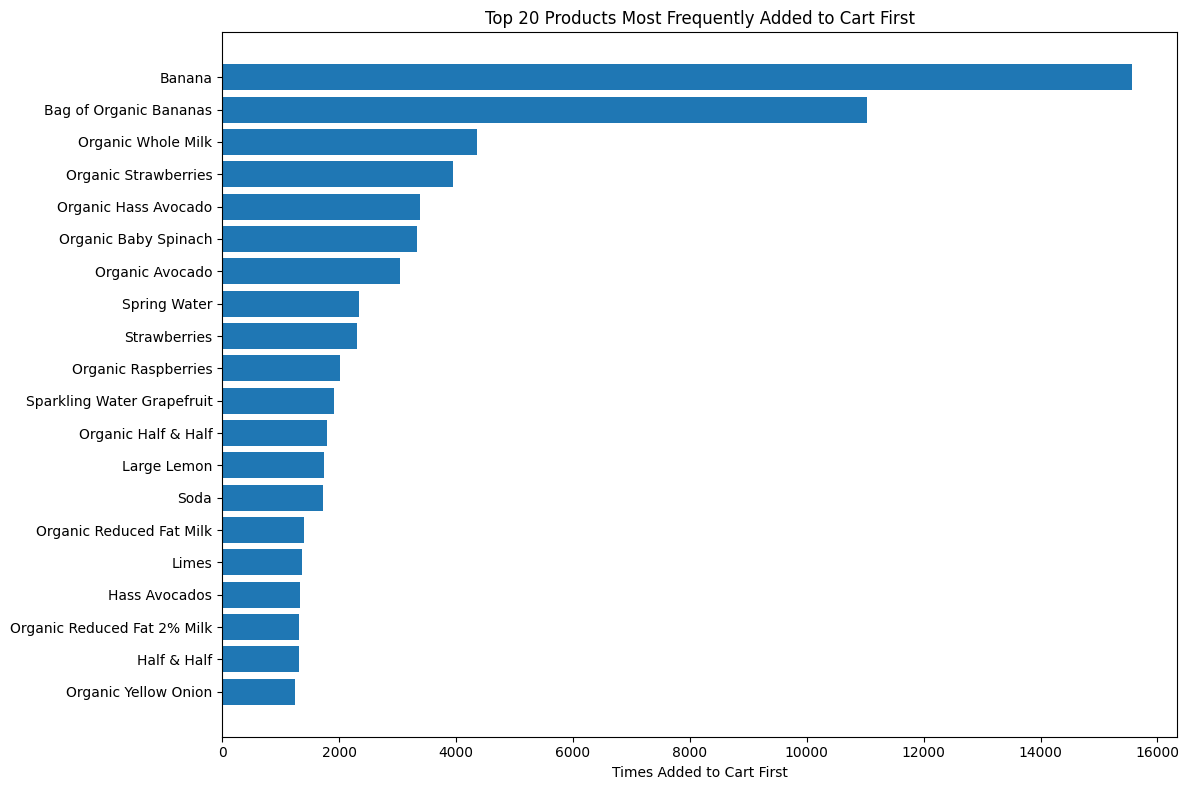

In [81]:
# Complete pipeline
mergedData = order_products.merge(products, on='product_id')
firstItems = mergedData[mergedData['add_to_cart_order'] == 1]
firstItemCounts = firstItems.groupby(['product_id', 'product_name']).size().sort_values(ascending=False).head(20)
top20FirstItems = firstItemCounts.reset_index()
top20FirstItems.columns = ['product_id', 'product_name', 'first_in_cart_count']

# Create bar chart
plt.figure(figsize=(12, 8))
plt.barh(range(len(top20FirstItems)), top20FirstItems['first_in_cart_count'])
plt.yticks(range(len(top20FirstItems)), top20FirstItems['product_name'])
plt.xlabel('Times Added to Cart First')
plt.title('Top 20 Products Most Frequently Added to Cart First')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()